# **Exploratory Data Analysis & Intro**

###**Goal**

1) Investigate top-paying roles and skills in the data science industry.

2) Use Python to explore a real-live dataset on job postings.

3) For job-seekers: use these insights to help find the best job opportunities.



### **Final Deliverables**

- Create Jupyter Notebookss (showcasing core skills in Python).

- Create a summary page (via README.md) capturing your findings.

- Share this project via GitHub & LinkedIn.


###**Questions to Answer**

1) What are the most demanded skills for the top 3 most popular data roles?

2) How are in-demand skills trending for Data Analysts?

3) How well do jobs and skills pay for Data Analysts?

4) What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)





# **An Overview of Data**

###**Roles to Explore**

In [2]:
!pip install datasets
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

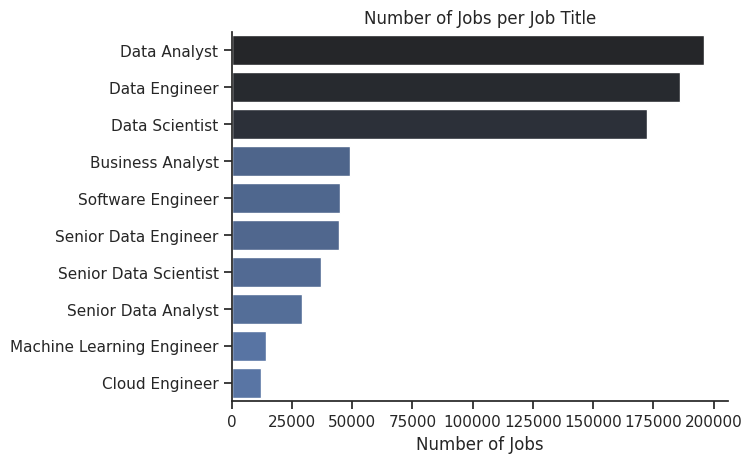

In [ ]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

###**Countries to Explore**



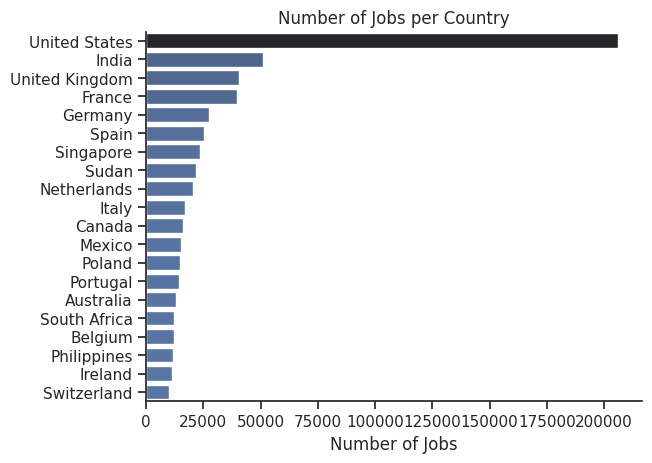

In [ ]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

###**Companies to Explore**

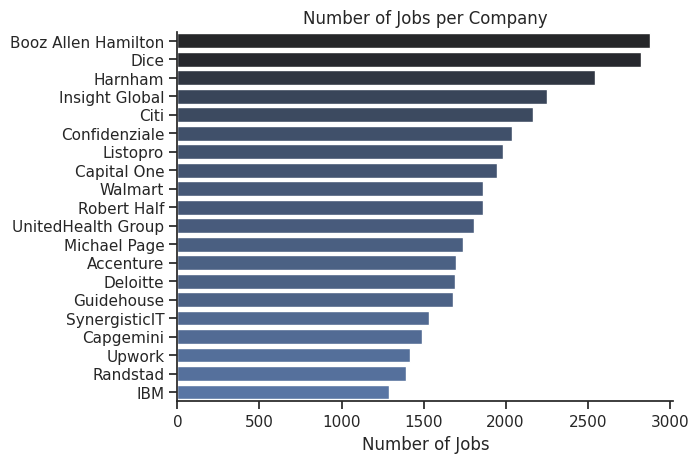

In [ ]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

###**Job Opportunities**

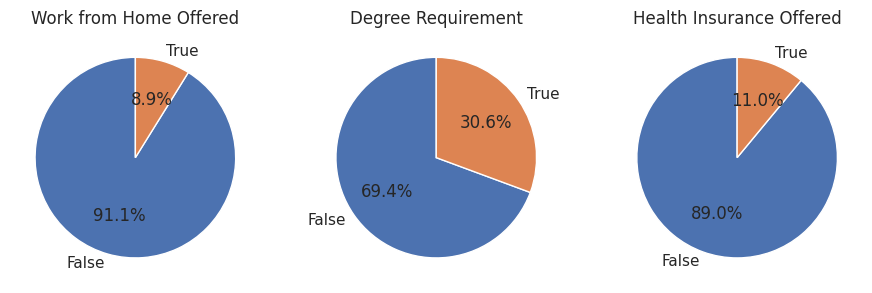

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

###**Exploratory Data Analysis for Data Analysts in India**

In [ ]:
df_DA_US = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

# **What are the most demanded skills for the top 3 most popular data roles?**

###**Methodology**
1) Clean-up skill column

2) Calculate skill count based on job_title_short

3) Calculate skill percentage

4) Plot final findings

###**Import Libraries and Data**

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter Data for India
df_India = df[df['job_country'] == 'India']



###**Explode Skills**

Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles.

In [ ]:
df_skills = df_India.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


###**Count Skills per Job Title**

In [ ]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


###**Create List of Top 3 Roles**

Filter the job titles based on the most popular.

In [ ]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

###**Plot Skill Counts**
Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill.

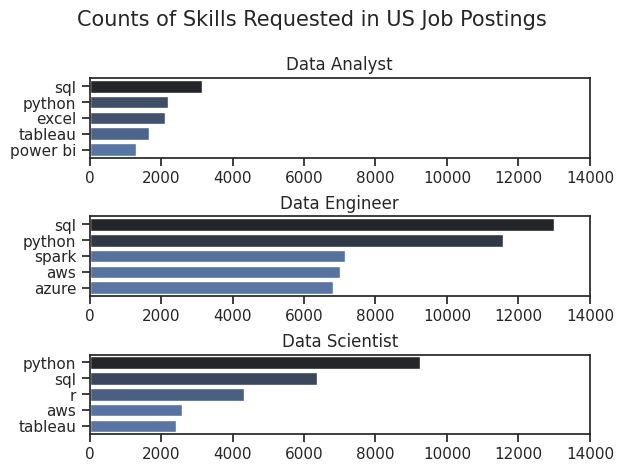

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 14000) # make the scales the same

fig.suptitle('Counts of Skills Requested in India Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

###**Convert Counts to Percentages**

**Focus: Counts don't show what portions of jobs are requesting these skills**

So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the value_counts() method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to job_title_short and total. The DataFrame df_job_title_count now holds a list of job titles alongside their total occurrences.

In [ ]:
# Use original df to get the count of job titles
df_job_title_count = df_India['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


Then we calculate the percentages. First merge df_skills_count and df_job_title_count, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [ ]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


###**Plot Percentage Count**

Filters and sorts a DataFrame to get the top 5 skills percentages for these top 3 roles. After sorting the skills by descending percentage, reverse the order of these top 5 entries to use in a horizontal bar plot, which by default starts plotting from the bottom.

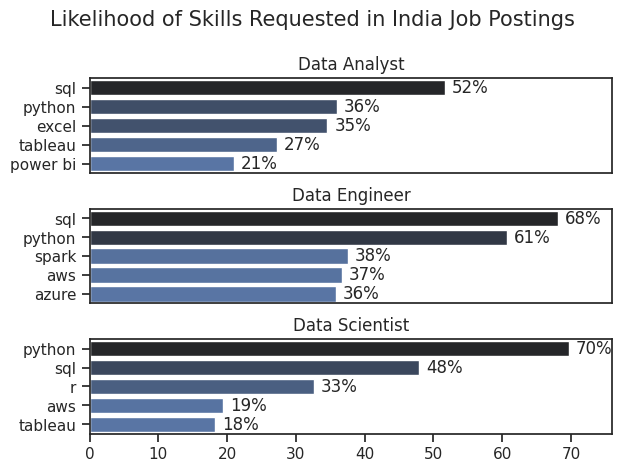

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 76)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

# **How are in-demand skills trending for Data Analysts?**



### **Methology**

1) Aggregate skill counts monthly

2) Re-analyze based on percentage of total jobs

3) Plot the monthly skill demand



###**Import Libraries and Data**

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### **Group the Skills by Month**
Select only those job postings that are for Data Analysts and the job country is the United States. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [ ]:
## Skill count per month for data analysts
df_DA_India= df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_India['job_posted_month_no'] = df_DA_India['job_posted_date'].dt.month

# Explode job_skills column
df_DA_India_explode = df_DA_India.explode('job_skills')

###**Pivot in Prep for Plotting**

Create a pivot table from the df_DA_US_explode, setting 'month' as the index, job_skills as the columns, and fills missing entries with zero.

In [ ]:
# Group by month and job_skills
df_DA_India_pivot = df_DA_India_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_India_pivot

job_skills,airflow,alteryx,ansible,arch,asana,asp.net,assembly,aurora,aws,azure,...,vba,visio,visual basic,vmware,watson,webex,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,0,0,6,5,...,6,1,0,0,0,1,1,0,8,0
2,1,8,0,0,0,0,0,0,6,7,...,8,0,0,0,1,0,1,0,3,0
3,1,1,1,0,0,0,0,0,7,6,...,4,0,0,0,0,0,2,0,3,0
4,0,1,0,1,0,0,1,0,4,8,...,2,2,0,0,0,0,1,0,6,0
5,0,4,0,0,0,0,0,0,4,9,...,4,0,1,0,0,0,2,0,4,0
6,1,5,0,0,0,0,0,1,10,9,...,1,0,1,1,0,0,0,0,1,0
7,3,2,0,0,0,0,0,0,5,8,...,5,0,1,0,0,0,0,0,1,0
8,7,5,0,0,0,0,0,0,20,11,...,4,0,0,0,0,0,0,0,7,0
9,1,2,0,0,1,0,0,0,12,5,...,4,2,0,2,0,0,1,0,1,0


###**Sort columns by count and change month numbers to names**

It adds a new row labeled Total that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [ ]:
# sorts by count
df_DA_India_pivot.loc['Total'] = df_DA_India_pivot.sum()
df_DA_India_pivot = df_DA_India_pivot[df_DA_India_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_India_pivot = df_DA_India_pivot.drop('Total')

df_DA_India_pivot

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,swift,ringcentral,suse,jupyter,sqlite,ggplot2,gitlab,graphql,no-sql
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,75,55,51,41,26,36,23,6,5,11,...,0,0,0,0,0,0,0,0,1,0
2,64,40,46,32,24,14,23,6,7,8,...,0,0,0,0,0,0,1,0,0,0
3,57,25,32,30,19,10,9,7,6,3,...,0,1,0,1,0,0,0,0,0,1
4,56,35,35,27,23,24,16,4,8,7,...,1,0,0,0,0,0,0,1,0,0
5,44,25,37,24,18,10,9,4,9,3,...,0,0,0,0,0,0,0,0,0,0
6,50,42,34,29,23,28,23,10,9,5,...,0,0,0,0,0,0,0,0,0,0
7,57,37,37,38,20,20,23,5,8,5,...,0,0,0,0,0,0,0,0,0,0
8,88,58,54,47,43,24,28,20,11,7,...,0,0,0,0,0,0,0,0,0,0
9,96,65,59,53,43,26,27,12,5,14,...,0,0,0,0,1,0,0,0,0,0


###**Plot the Monthly Skill Counts**

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

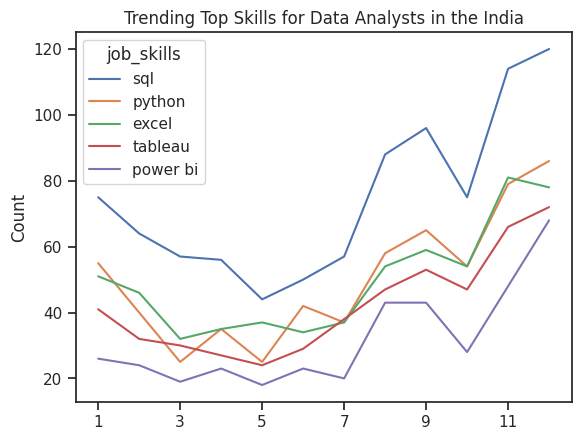

In [ ]:
df_DA_India_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

This is good but totals can be misleading without context. Percentages clarify relationships within the whole, giving a more accurate comparison.

###**Calculate Percentage of Total Jobs**

Calculates the total number of entries for each month in df_DA by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in DA_totals. This is needed to compute the percentages.

In [ ]:
# Get monthly totals
DA_totals = df_DA_India.groupby('job_posted_month_no').size()

DA_totals

,0
job_posted_month_no,
1,144
2,118
3,97
4,99
5,64
6,93
7,92
8,141
9,166


This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the df_DA_pivot DataFrame, which contains skill counts, by the monthly totals in DA_totals and multiplying by 100. The new DataFrame, df_DA_pivot_percent, shows skill distributions as percentages of total monthly job entries.

In [ ]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_India_percent = df_DA_India_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_India_percent = df_DA_India_percent.reset_index()
df_DA_India_percent['job_posted_month'] = df_DA_India_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_India_percent = df_DA_India_percent.set_index('job_posted_month')
df_DA_India_percent = df_DA_India_percent.drop(columns='job_posted_month_no')

df_DA_India_percent

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,swift,ringcentral,suse,jupyter,sqlite,ggplot2,gitlab,graphql,no-sql
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,52.083333,38.194444,35.416667,28.472222,18.055556,25.000000,15.972222,4.166667,3.472222,7.638889,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.694444,0.000000
Feb,54.237288,33.898305,38.983051,27.118644,20.338983,11.864407,19.491525,5.084746,5.932203,6.779661,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.847458,0.000000,0.000000,0.000000
Mar,58.762887,25.773196,32.989691,30.927835,19.587629,10.309278,9.278351,7.216495,6.185567,3.092784,...,0.000000,1.030928,0.000000,1.030928,0.00000,0.000000,0.000000,0.000000,0.000000,1.030928
Apr,56.565657,35.353535,35.353535,27.272727,23.232323,24.242424,16.161616,4.040404,8.080808,7.070707,...,1.010101,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.010101,0.000000,0.000000
May,68.750000,39.062500,57.812500,37.500000,28.125000,15.625000,14.062500,6.250000,14.062500,4.687500,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,53.763441,45.161290,36.559140,31.182796,24.731183,30.107527,24.731183,10.752688,9.677419,5.376344,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,61.956522,40.217391,40.217391,41.304348,21.739130,21.739130,25.000000,5.434783,8.695652,5.434783,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,62.411348,41.134752,38.297872,33.333333,30.496454,17.021277,19.858156,14.184397,7.801418,4.964539,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,57.831325,39.156627,35.542169,31.927711,25.903614,15.662651,16.265060,7.228916,3.012048,8.433735,...,0.000000,0.000000,0.000000,0.000000,0.60241,0.000000,0.000000,0.000000,0.000000,0.000000


###**Plot Monthly Skill Demand**

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the df_DA_pivot_percent DataFrame. Also the legend is moved outside of the plot for readability.

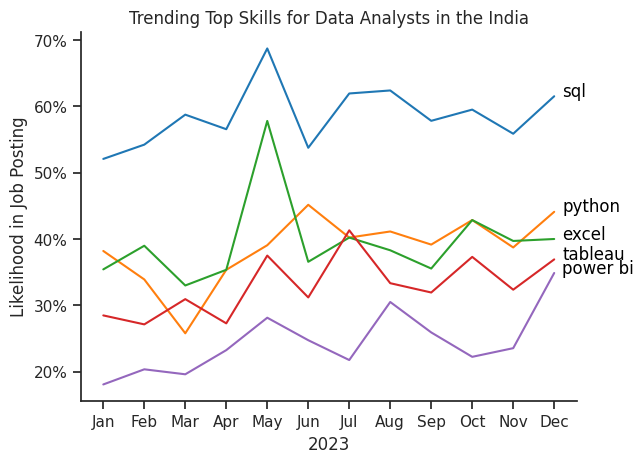

In [ ]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_India_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()

# **How well do jobs and skills pay for Data Analysts?**

###**Methology**

1) Evaluate median salary for top 6 data jobs.

2) Find median salary per skill for Data Analysts.

3) Visualize for highest paying skills and most demanded skills

###**Import Libraries and Data**

In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

###**Salary Distribution by Job Title**

Filter our data to only include salary values from India.

In [4]:
# filter for the job titles and country
df_India = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [5]:
job_titles = df_India['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_India_top6 = df_India[df_India['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_India_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

###**Plot Salary Distributions**

Plot the top 6 job titles salary distributions using a box plot.

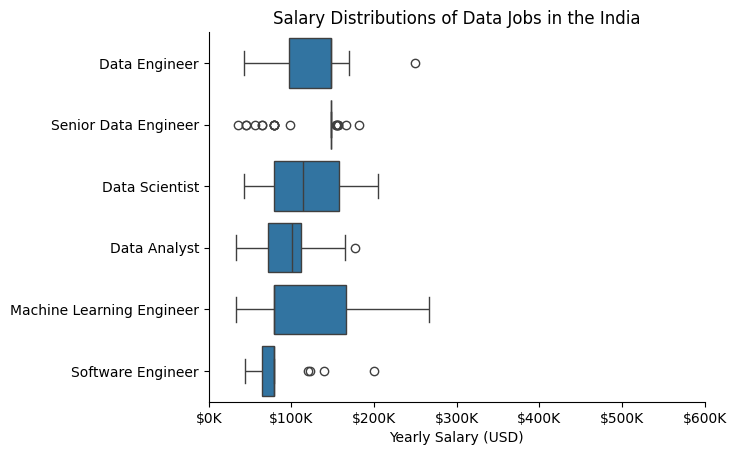

In [7]:
sns.boxplot(data=df_India_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

###**Investigate Median Salary Vs Skill for Data Analysts**

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'India', to create a new DataFrame df_DA_India. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the salary_year_avg and job_skills columns.

In [9]:
# Only get data analyst jobs in the US
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

df_DA_India = df_DA_India.explode('job_skills')

df_DA_India[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


###**Determine The Highest Paid Skills and Most Demanded Skills**

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the df_DA_India. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (df_DA_top_pay) with a reset index and a renamed salary column labeled 'median_salary'.

In [10]:
df_DA_top_pay = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


Calculates the count and median salary for each skill in df_DA_India. It groups the data by job_skills, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [11]:
df_DA_skills = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


Creates two horizontal bar charts:

1) Displays the highest paid skills

2) Shows the most in demand skills

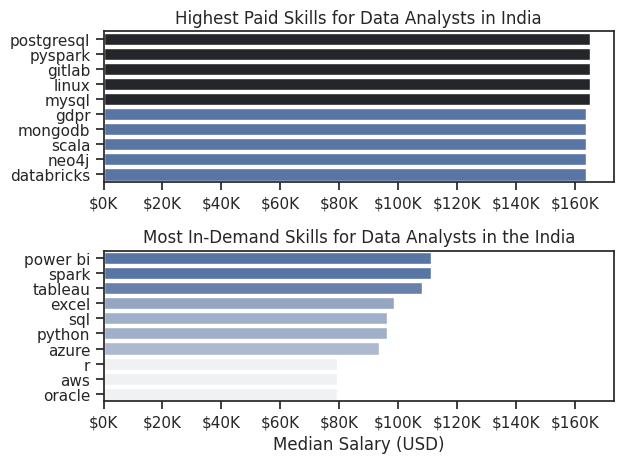

In [12]:
fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()

# **What is the most optimal skill to learn for Data Analysts?**

###**Methodology**

1) Continue from last notebook to find percent of postings with skill

2) Visualize median salary vs percent skill demand

3) (Optional) Determine if certain technologies are more prevalent

###**Import Libraries and Data**

Import the libraries, data and change the job_posted_date to a datetime type.

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

###**Clean Data**

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'India', to create a new DataFrame df_DA_India. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in a new DataFrame (df_DA_India_exploded) for each skill associated with a job. Finally, it displays the first 5 entries of the salary_year_avg and job_skills columns.

In [13]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

df_DA_India_exploded = df_DA_India.explode('job_skills')

df_DA_India_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


###**Calculate Percent of Job Postings that Have Skills**

Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number of Data Analyst jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [14]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_India_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_India)  # Find count of Data Analyst jobs in India with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


###**Median Salary vs Percent Skill Demand**

Filters for Data Analyst skills that exceed a certain percentage (skill_limit).

In [15]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

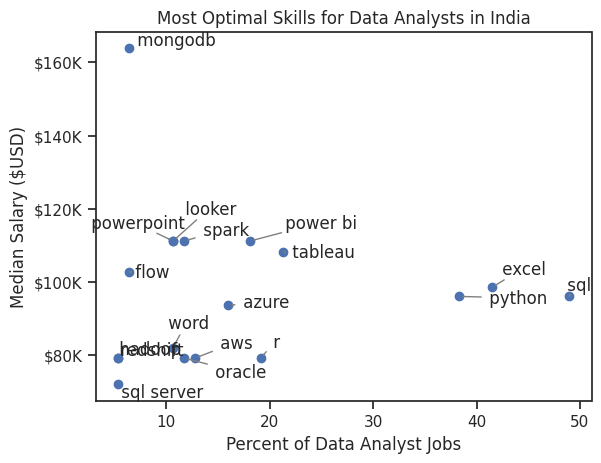

In [18]:
!pip install adjustText
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in India')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()